In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
pd.plotting.register_matplotlib_converters()
import seaborn as sns
import plotly.express as px

print(f"Pandas version: {pd.__version__}")
print(f"Numpy version: {np.__version__}")
# It's so important which we use version when analiyzing.

Pandas version: 1.4.0
Numpy version: 1.22.1


# Reading the data

In [2]:
SPE_data = pd.read_csv('/Users/barborostasdemir/Desktop/Students Performance in Exams/StudentsPerformance.csv')
# we are pulling our csv file from the file path using "pd_csv".

# We are looking data

In [5]:
SPE_data.shape
#We learn the format of the data set

(1000, 8)

In [6]:
SPE_data.head(4)
# we bring the top 4 values

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44


In [8]:
SPE_data.tail(6)
#we bring the last 6 values

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
994,male,group A,high school,standard,none,63,63,62
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


In [56]:
SPE_data.describe().T
# we define the values of the 'data' set

,count,mean,std,min,25%,50%,75%,max
math score,1000.0,66.089,15.163080,0.0,57.00,66.0,77.0,100.0
reading score,1000.0,69.169,14.600192,17.0,59.00,70.0,79.0,100.0
writing score,1000.0,68.054,15.195657,10.0,57.75,69.0,79.0,100.0


# Data Editing

In [11]:
def gt_SPE_data(df: pd.DataFrame) -> pd.DataFrame: 
    return(
    df # Formatting column names (Series Title -> series_title

    .rename(columns=lambda column_:column_.lower().replace(" ","_"))
    # Replacing "****" values, converting column type and extracting relevant info

)

In [14]:
trsfd_SPE_data= gt_SPE_data(SPE_data)


In [15]:
trsfd_SPE_data

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


* In this way, we have removed the spaces in the column names.
* The data is more analyzable.

In [21]:
trsfd_SPE_data["math_score"].value_counts()


65    36
62    35
69    32
59    32
61    27
      ..
24     1
28     1
33     1
18     1
8      1
Name: math_score, Length: 81, dtype: int64

In [22]:
trsfd_SPE_data.isnull().sum()

gender                         0
race/ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

* we dont have null values

In [24]:
trsfd_SPE_data["race/ethnicity"].replace(["group A","group B","group C","group D","group E"],["A","B","C","D","E"],inplace =True)
# we change the values that need to be changed using the "Replace" method

In [26]:
trsfd_SPE_data["race/ethnicity"].unique()
# In this way, we check to see if there is another header in the data set and if the replacement operation was successful

array(['B', 'C', 'A', 'D', 'E'], dtype=object)

In [27]:
trsfd_SPE_data.groupby("race/ethnicity").size().reset_index()

,race/ethnicity,0
0,A,89
1,B,190
2,C,319
3,D,262
4,E,140


# Graduation levels according to ethnic groups

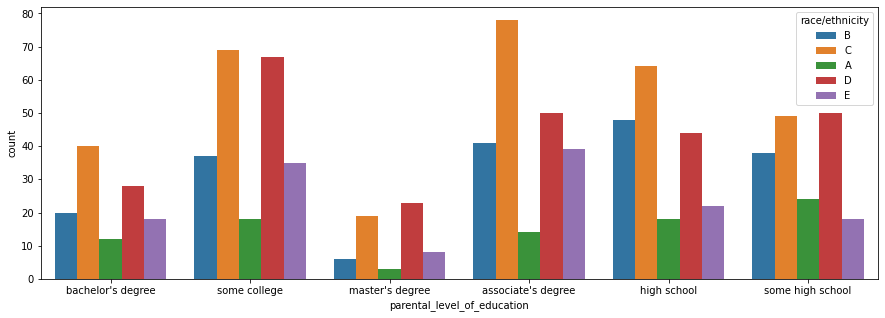

In [31]:
plt.figure(figsize=(15,5))
sns.countplot(x = "parental_level_of_education", hue="race/ethnicity", data=trsfd_SPE_data);

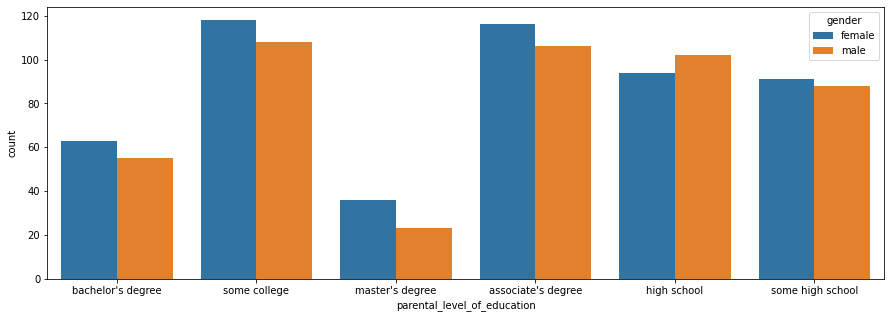

In [33]:
plt.figure(figsize=(15,5))
sns.countplot(x ="parental_level_of_education" , hue="gender", data= trsfd_SPE_data);

In [34]:
trsfd_SPE_data

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,B,bachelor's degree,standard,none,72,72,74
1,female,C,some college,standard,completed,69,90,88
2,female,B,master's degree,standard,none,90,95,93
3,male,A,associate's degree,free/reduced,none,47,57,44
4,male,C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,E,master's degree,standard,completed,88,99,95
996,male,C,high school,free/reduced,none,62,55,55
997,female,C,high school,free/reduced,completed,59,71,65
998,female,D,some college,standard,completed,68,78,77


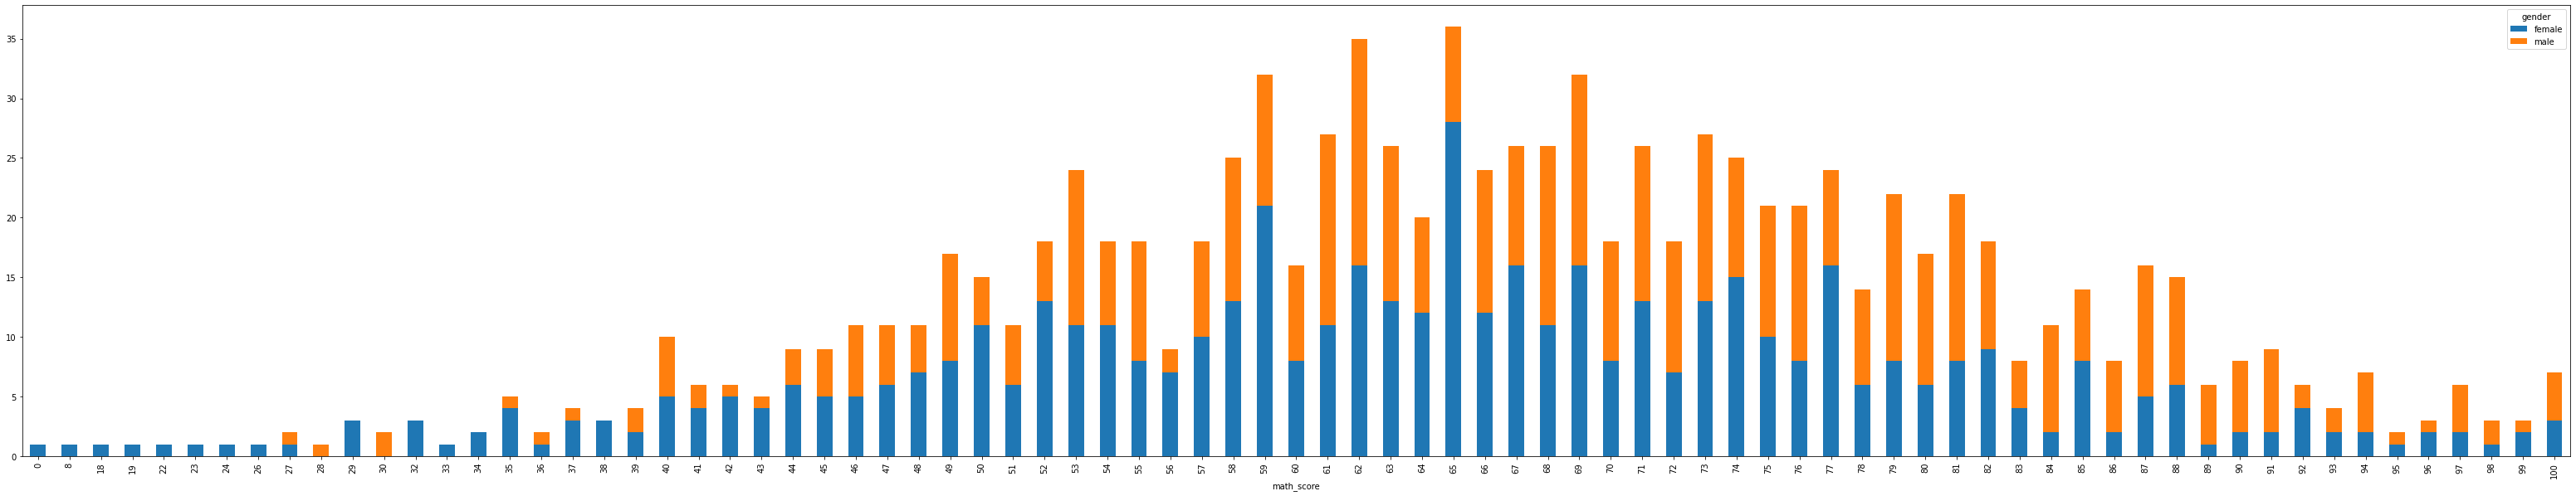

In [38]:
math_score = trsfd_SPE_data.groupby(["gender","math_score"]).size().reset_index().pivot_table(columns='gender', index='math_score',values=0)
math_score.plot(kind="bar", stacked=True, figsize=(55,10));

* As I understand here, we can see that female users have more math scores.

In [50]:
Male_count = trsfd_SPE_data[trsfd_SPE_data['gender'] == 'male'].count()['math_score']

In [51]:
Female_count = trsfd_SPE_data[trsfd_SPE_data['gender'] == 'female'].count()['math_score']

In [52]:
Male_count, Female_count

(482, 518)

* Total number of male and female users

- Let's see this in pie chart form


In [62]:
fig1_MF = px.pie(trsfd_SPE_data, values= trsfd_SPE_data['gender'].value_counts().values,names = trsfd_SPE_data['gender'].value_counts().index)

In [61]:
fig1_MF.show()

## We use visualizing reading, writing and math scores with scatter plot.

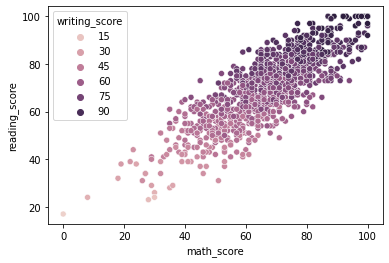

In [64]:
sns.scatterplot(x = trsfd_SPE_data.math_score, y = trsfd_SPE_data.reading_score, hue= trsfd_SPE_data.writing_score);

In [65]:
fig_math_box = px.histogram(trsfd_SPE_data, x = "math_score", marginal="box")

In [66]:
fig_math_box.show()

In [67]:
fig_reading_box = px.histogram(trsfd_SPE_data, x = "reading_score", marginal='box')

In [68]:
fig_reading_box.show()

In [69]:
fig_writing_box = px.histogram(trsfd_SPE_data, x = "writing_score", marginal='box')

In [70]:
fig_writing_box

In [72]:
import plotly.figure_factory as ff
import numpy as np

x1 = trsfd_SPE_data.math_score
x2 = trsfd_SPE_data.writing_score
x3 = trsfd_SPE_data.reading_score

hist_data = [x1, x2, x3]

group_labels = ['math_score','writing score','reading score']
colors = ['#393E46', '#2BCDC1', '#F66095']

fig = ff.create_distplot(hist_data, group_labels, show_hist=False,colors=colors)
fig.update_layout(title_text='Curve and Rug PLot')
fig.show()

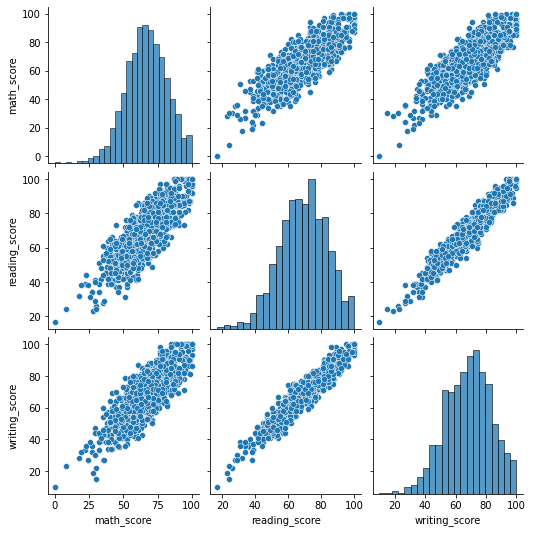

In [73]:
sns.pairplot(trsfd_SPE_data)
plt.show()